# Visualization of Gundem/MEDDIC2 Data

The following function displays the copy number profiles for a phylogeny:

In [12]:
import csv
import matplotlib.pyplot as plt

def plot_cnps(path):
    with open(path) as f:
        rows = csv.reader(f)
        cnps = [list(map(int, row)) for row in rows]

        plt.imshow(cnps, aspect="auto", interpolation="nearest")
        plt.show()

We used results from MEDDIC2 as input and ran our optimization. The following samples saw improvements over the original results:

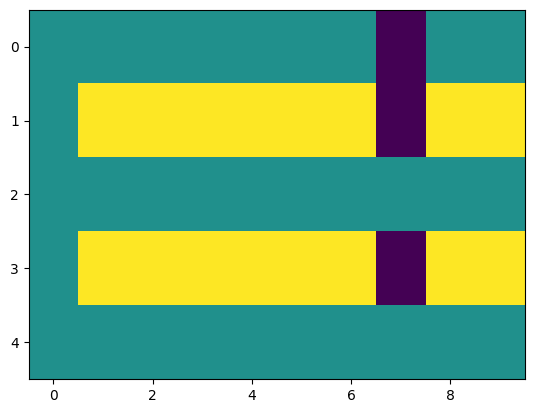

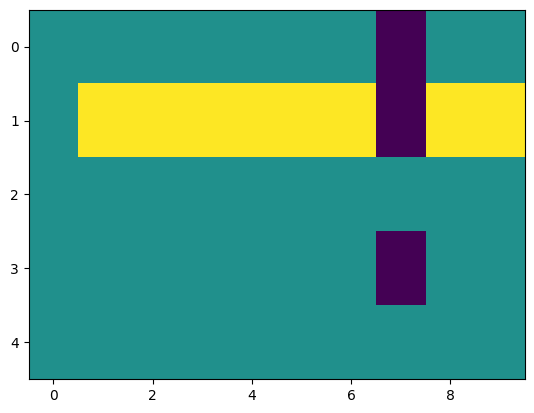

In [13]:
plot_cnps("../data/medicc2/PTX010/chr10b.csv")
plot_cnps("../data/results/PTX010/chr10b.csv")

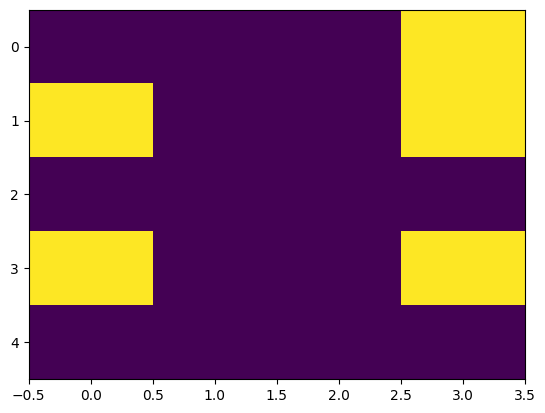

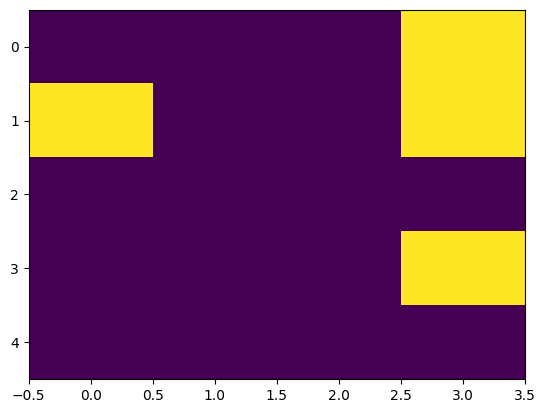

In [14]:
plot_cnps("../data/medicc2/PTX010/chr18b.csv")
plot_cnps("../data/results/PTX010/chr18b.csv")

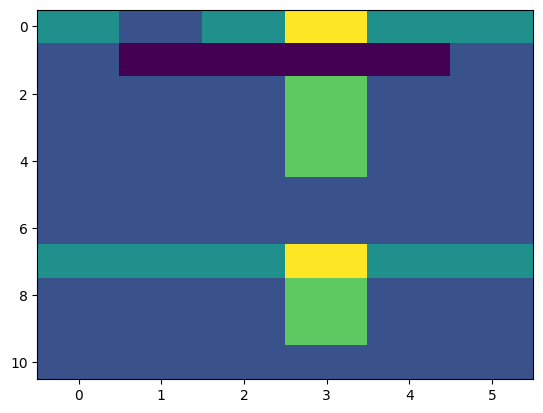

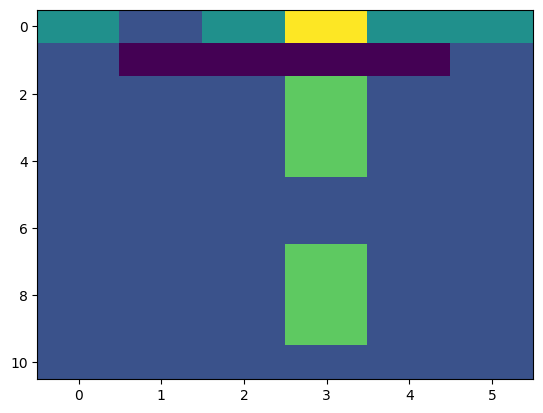

In [15]:
plot_cnps("../data/medicc2/PTX011/chr5b.csv")
plot_cnps("../data/results/PTX011/chr5b.csv")

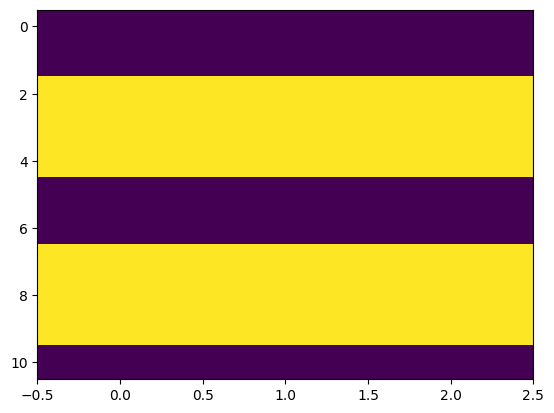

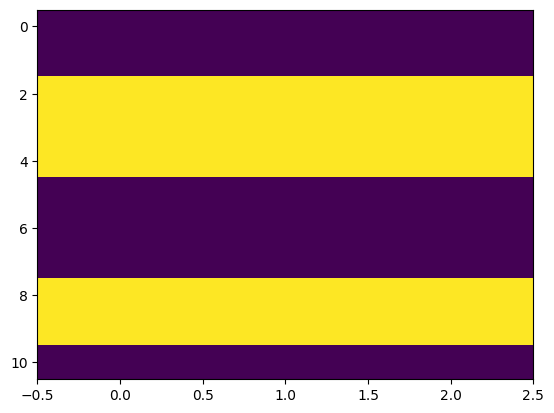

In [16]:
plot_cnps("../data/medicc2/PTX011/chr18b.csv")
plot_cnps("../data/results/PTX011/chr18b.csv")

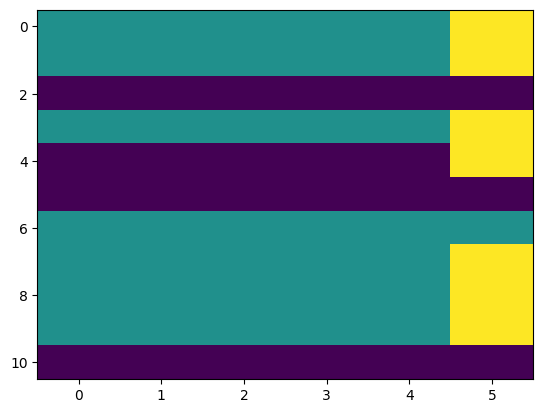

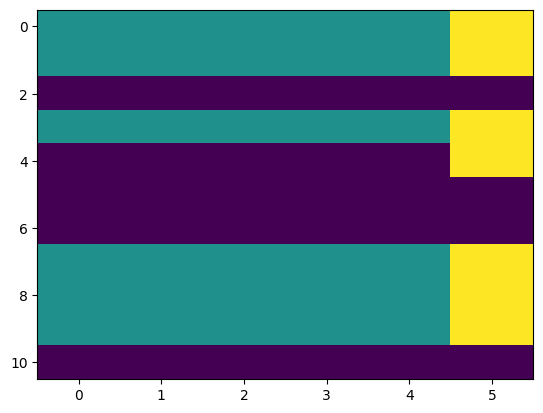

In [17]:
plot_cnps("../data/medicc2/PTX012/chr14b.csv")
plot_cnps("../data/results/PTX012/chr14b.csv")